# Plot CR fidelity vs drive strength

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

In [2]:
with open('data_cr_transmon_fluxonium/cr_fidelity_drive_.txt') as file_data:
    result = json.load(file_data)

In [3]:
gate_times = [result[my_key][x]["gate_time"] for my_key in result.keys() for x in range(5) ]
fid_echo_max_min = min([max([result[my_key][x]["F_gate_echo"] for x in range(5)]) for my_key in result.keys()])
fid_echo_max_min_noisy = min([max([result[my_key][x]["F_gate_echo_noisy"] for x in range(5)]) for my_key in result.keys()])

In [4]:
def plot_fidelity_drive(
    result: List,
    opt={'fs': 24, 'lw': 2.0, 'ls': 20, 'fsl':20, "ms":8},
    save=False
):
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    eps = [0.1*1e3*x for x in range(1, 6)]
    freqs = {"CR_1": '4.3', "CR_2": '4.7', "CR_3": '5.3', "CR_4": '5.7'}
    labels = {"gaussian":'Gaussian', "echo":'Gaussian-echo'}
    colors = {"noiseless": "red", "noisy": 'grey', }
    markers = {"gaussian": 'X', 'echo': 'D'}
    p_set_list = list(result.keys())
    ax_dict = {"CR_1": [0, 0], "CR_2": [0, 1], "CR_3": [1, 0], "CR_4": [1, 1]}
    for p_set in p_set_list:
        j, k = ax_dict[p_set][0], ax_dict[p_set][1]
        
        ax[j, k].semilogy(eps, [1 - result[p_set][x]["F_gate"] for x in range(0, 5)], 
                          marker=markers["gaussian"], linestyle='None', markersize=opt["ms"],
                         color=colors["noiseless"], label=labels["gaussian"])
        ax[j, k].semilogy(eps, [1 - result[p_set][x]["F_gate_noisy"] for x in range(0, 5)], 
                          marker=markers["gaussian"], linestyle='None', markersize=opt["ms"],
                         color=colors["noisy"])
        ax[j, k].semilogy(eps, [1 - result[p_set][x]["F_gate_echo"] for x in range(0, 5)], 
                          marker=markers["echo"], linestyle='None', markersize=opt["ms"],
                          color=colors["noiseless"], label=labels["echo"])
        ax[j, k].semilogy(eps, [1 - result[p_set][x]["F_gate_echo_noisy"] for x in range(0, 5)], 
                          marker=markers["echo"], linestyle='None', markersize=opt["ms"],
                          color=colors["noisy"])
        ax[j, k].set_title('$\omega_t/2 \pi =' + freqs[p_set] + '\, \mathrm{GHz}$', fontsize=opt["fs"])
    
    x_ticks = [0.1*1e3*x for x in range(1, 6)]
    x_ticks_latex = ['$100$', '$200$','$300$', '$400$', '$500$']
    y_ticks = [0.1, 0.01, 0.001]
    y_ticks_latex = ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$']
    for k in [0, 1]:
        for j in [0, 1]:
            ax[k, j].set_xticks(x_ticks)
            ax[k, j].set_xticklabels(x_ticks_latex)
            ax[k, j].set_yticks(y_ticks)
            ax[k, j].set_yticklabels(y_ticks_latex)
            ax[k, j].tick_params(axis='both', labelsize=opt["ls"])
            ax[k, j].legend(loc='upper right', fontsize=opt["fsl"])
    
    ax[1, 0].set_xlabel("$\\varepsilon_d/2 \pi \, (\mathrm{MHz}) $", fontsize=opt["fs"])
    ax[1, 1].set_xlabel("$\\varepsilon_d/2 \pi \, (\mathrm{MHz}) $", fontsize=opt["fs"])
    ax[0, 0].set_ylabel("$1 - F_{\mathrm{gate}}$", fontsize=opt["fs"])
    ax[1, 0].set_ylabel("$1 - F_{\mathrm{gate}}$", fontsize=opt["fs"])
    
    if save:
        plt.savefig("cr_fidelity_drive.svg")
    
    
    plt.show()
    

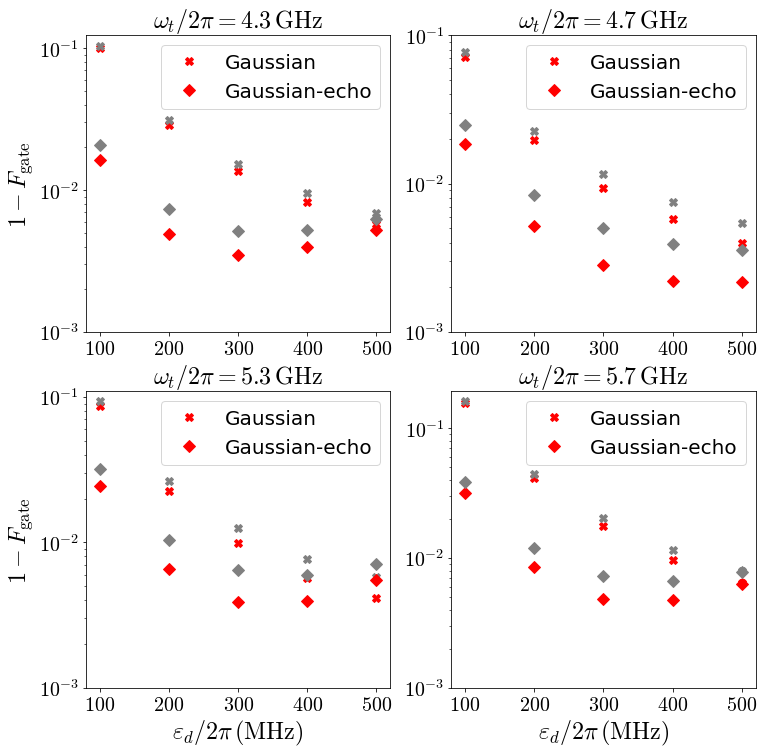

In [6]:
plot_fidelity_drive(result, save=True)